# Project 2: Classification

## Data Dictionary:
1. id: unique identifier (int)
2. gender: "Male", "Female" or "Other" (object)
3. age: age of the patient (int)
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension (int)
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease (int)
6. ever_married: "No" or "Yes" (object)
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (object)
8. Residence_type: "Rural" or "Urban" (object)
9. avg_glucose_level: average glucose level in blood (int)
10. bmi: body mass index (int)
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (object)
12. stroke: 1 if the patient had a stroke or 0 if not (int)

## Import Libraries

In [201]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, precision_score,
                             PrecisionRecallDisplay, recall_score, RocCurveDisplay, f1_score,
                            accuracy_score, classification_report)

## Load Data Set

In [202]:
# Load Data
df = pd.read_csv("C:\\Users\\hamma\\Coding Dojo\\00 Data Sets\\healthcare-dataset-stroke-data (2).csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [203]:
df.shape

(5110, 12)

> There are 5110 rows and 12 columns

In [204]:
# Make copy of dataset for machine learning later
df_ml = df.copy()
df_ml.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Cleaning

In [205]:
# Inspect Data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [206]:
# Delete Unnecessary Columns
df.drop(columns='id',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


> The 'id' column was removed since it was a unique identifier to each row.

In [207]:
# Check for Duplicated Rows
df.duplicated().sum()

0

> There are no duplicated rows to be dealt with.

In [208]:
# Find Missing Values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [209]:
# Use 'bmi' column to create a new categorical column
# bmi < 18.5 = underweight
# bmi >= 18.5 | < 24.9 = normal weight
# bmi >= 25 | < 29.9 = overweight
# bmi >= 30 | < 34.9 = class 1 obesity
# bmi >= 35 | < 39.9 = class 2 obesity
# bmi >= 40 = class 3 obesity
df['weight_status'] = df['bmi'].apply(lambda x: 'underweight' if x < 18.5 else
                            'normal weight' if x >= 18.5 and x < 24.9 else
                            'overweight' if x >= 25 and x < 29.9 else 
                            'class 1 obesity' if x >= 30 and x < 34.9 else
                            'class 2 obesity' if x >= 35 and x < 39.9 else
                            'class 3 obesity')
df['weight_status'].value_counts()

overweight         1383
normal weight      1216
class 1 obesity     989
class 3 obesity     684
class 2 obesity     501
underweight         337
Name: weight_status, dtype: int64

In [210]:
# Check missing values for new column
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
weight_status          0
dtype: int64

> There are 201 missing values in the 'bmi' column which is 3.9% of data missing in the column. These values were dealt with by filling the missing values with the mean of the column.

In [211]:
# Checking the Data Types Compared to Data Dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  weight_status      5110 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 479.2+ KB


> All data types match the data dictionary.

In [212]:
# Identify Inconsistencies in Categorical Values
for i in df.select_dtypes(include='object'):
  count = df[i].value_counts()
  print(count)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
overweight         1383
normal weight      1216
class 1 obesity     989
class 3 obesity     684
class 2 obesity     501
underweight         337
Name: weight_status, dtype: int64


In [213]:
df['work_type'].replace('children', 'Children', inplace=True)
df['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [214]:
df['smoking_status'].replace({'never smoked': 'Never Smoked', 'formerly smoked': 'Formerly Smoked', 'smokes': 'Smokes'}, inplace=True)
df['smoking_status'].value_counts()

Never Smoked       1892
Unknown            1544
Formerly Smoked     885
Smokes              789
Name: smoking_status, dtype: int64

In [215]:
# Inspect Data for Impossible Values
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [216]:
# Check values for 'age' column
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [217]:
# Create new categorical column for 'age' column
df['age_status'] = df['age'].apply(lambda x: 'infant' if x <= 1 else 'child' if x > 1
                           and x <= 12 else 'adolescent' if x > 12 and x <= 17
                           else 'adult' if x > 17 and x < 65 else 'senior')
df['age_status'].value_counts(normalize=True)

adult         0.631507
senior        0.200978
child         0.105675
adolescent    0.052446
infant        0.009393
Name: age_status, dtype: float64

In [218]:
# Inspect categorical statistics
df.describe(exclude='number')

,gender,ever_married,work_type,Residence_type,smoking_status,weight_status,age_status
count,5110,5110,5110,5110,5110,5110,5110
unique,3,2,5,2,4,6,5
top,Female,Yes,Private,Urban,Never Smoked,overweight,adult
freq,2994,3353,2925,2596,1892,1383,3227


## Exploratory Data Analysis

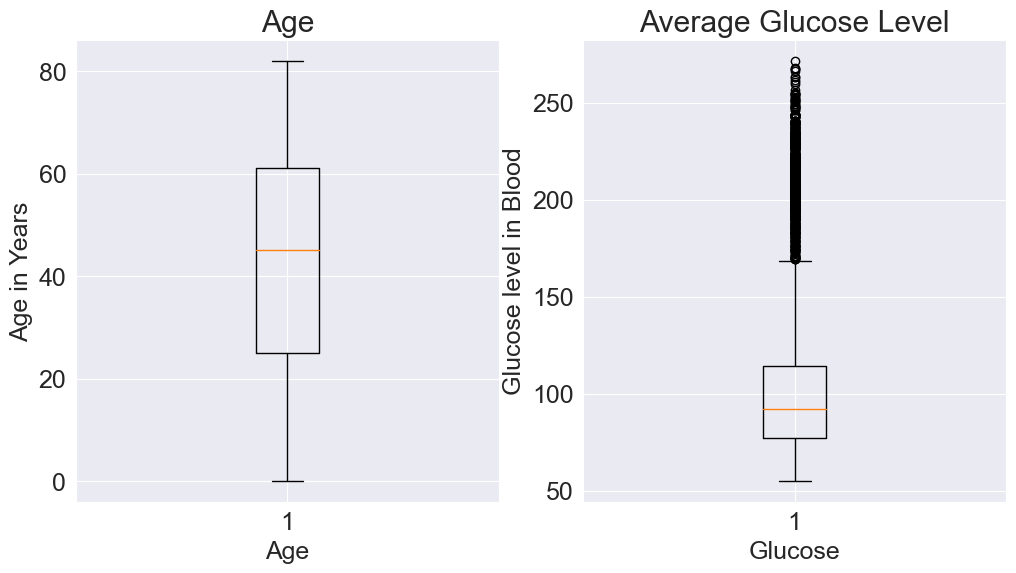

In [219]:
# Subplots for Boxplots for Numerical Outliers
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6));
# Subplot 1 
axes[0].boxplot(df['age'])
axes[0].set_title('Age')
axes[0].set_ylabel('Age in Years');
axes[0].set_xlabel('Age');
# Subplot 2
axes[1].boxplot(df['avg_glucose_level'])
axes[1].set_title('Average Glucose Level')
axes[1].set_ylabel('Glucose level in Blood');
axes[1].set_xlabel('Glucose');

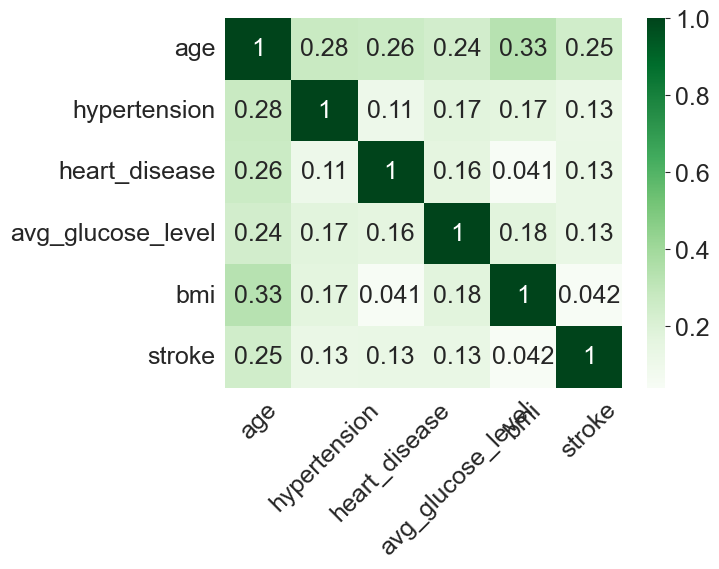

In [220]:
# Create correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='Greens', annot=True)
plt.xticks(rotation=45);

> There is a low correlation between age and stroke. It is worth noting that age is correlated with all of the features and target. The correlation is very low, but it would be worth exploring if the correlations went up or down with different combinations of the features.

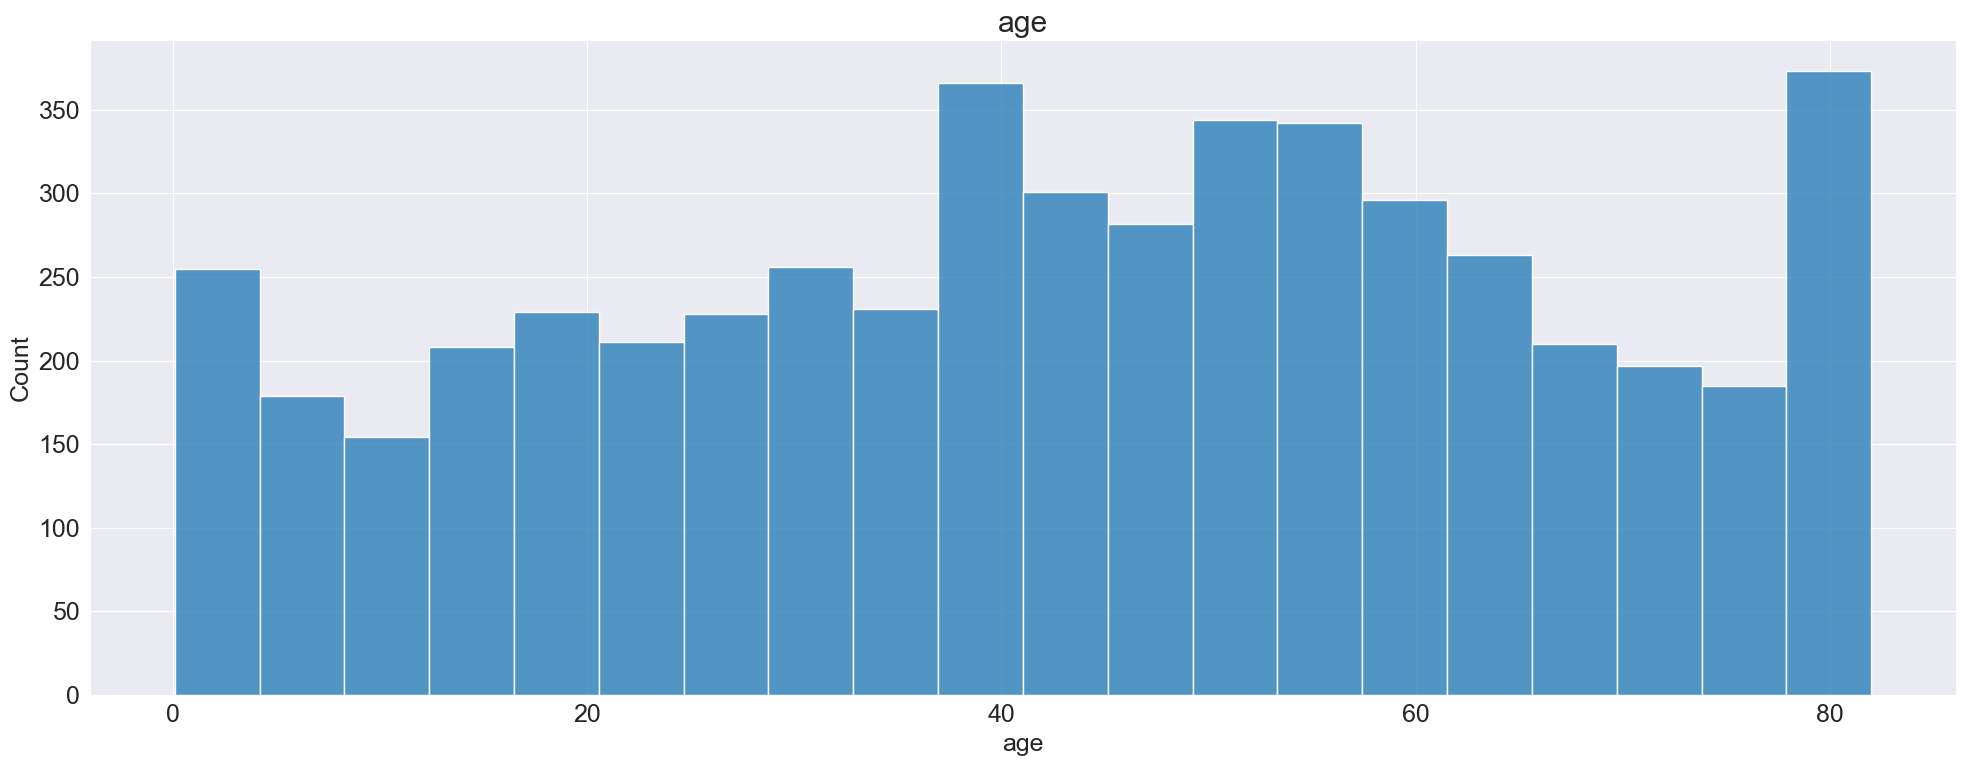

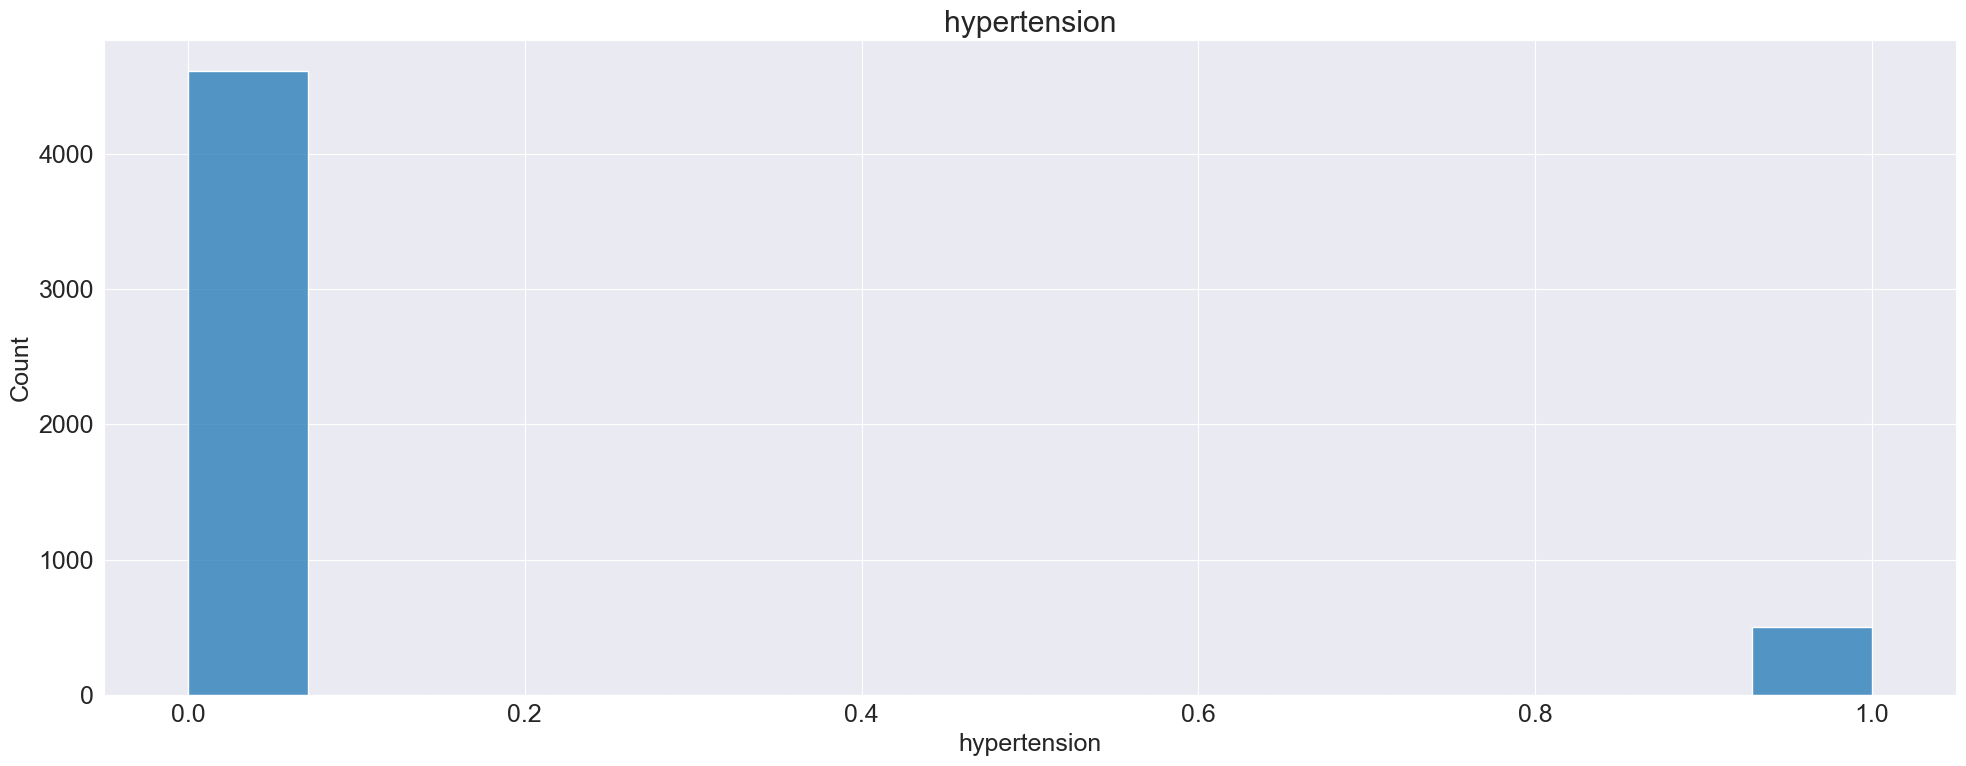

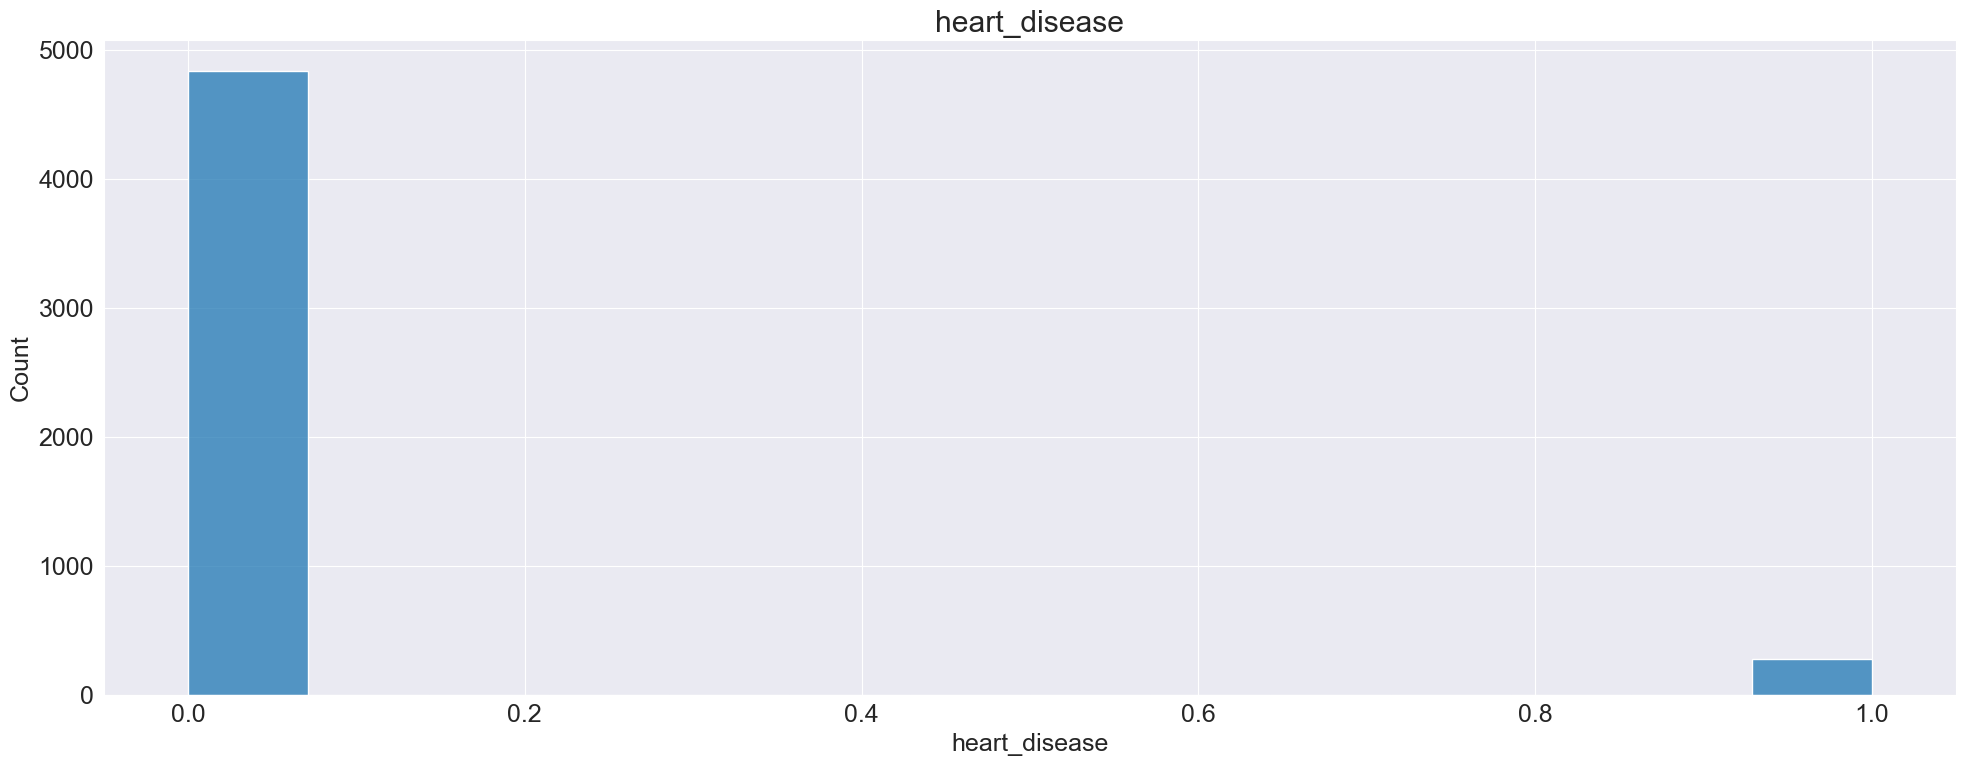

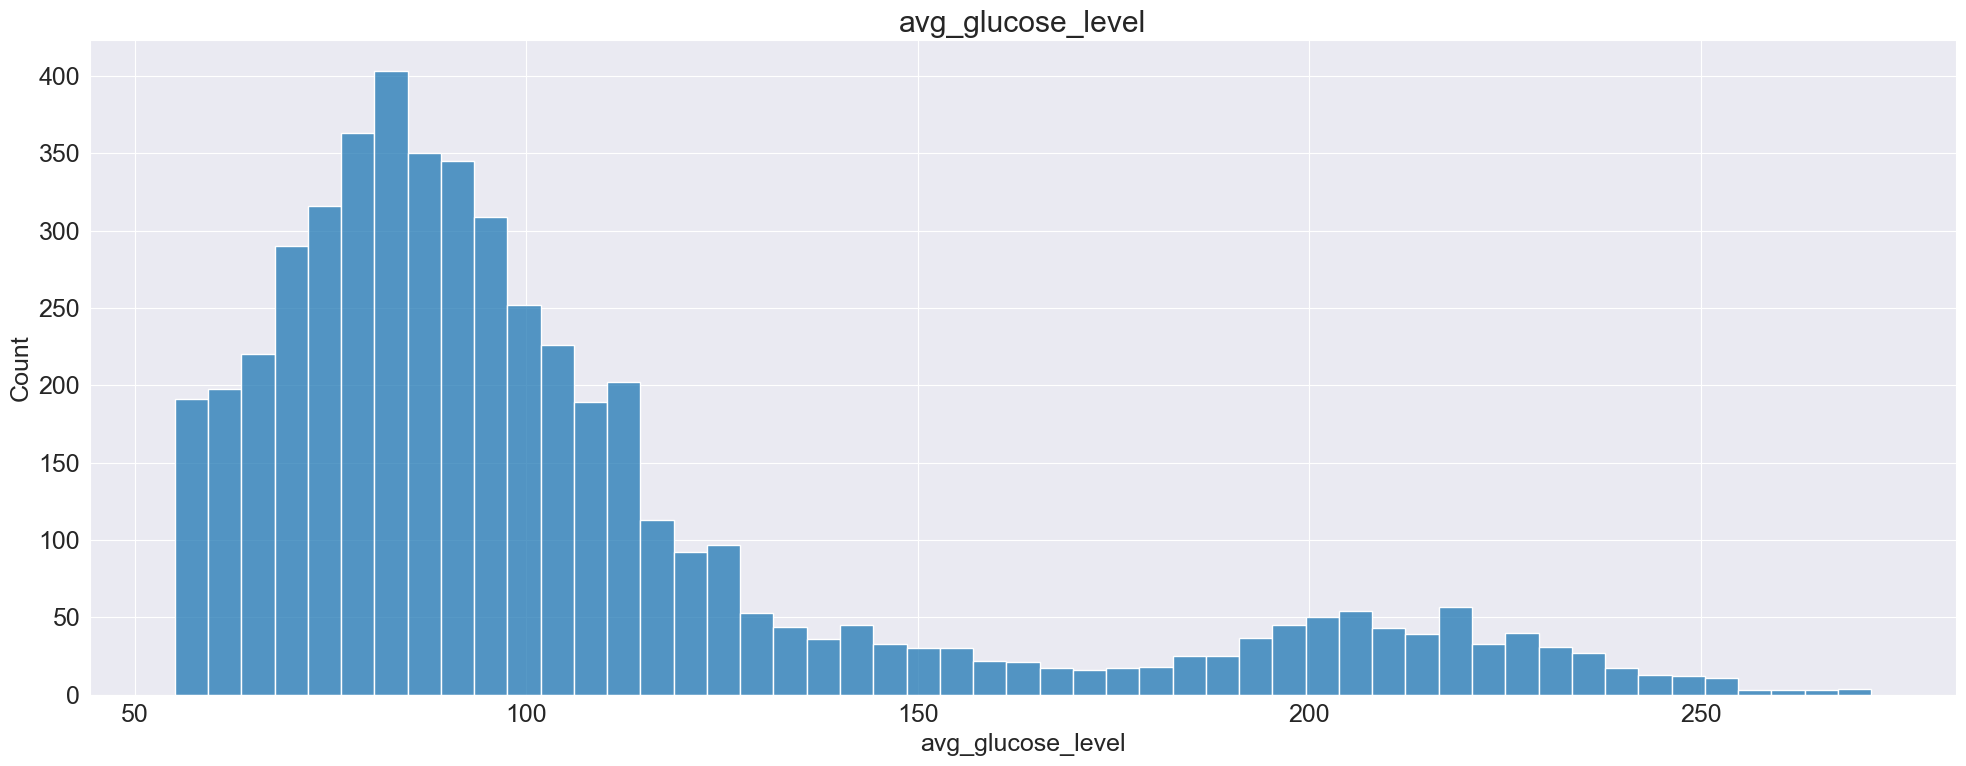

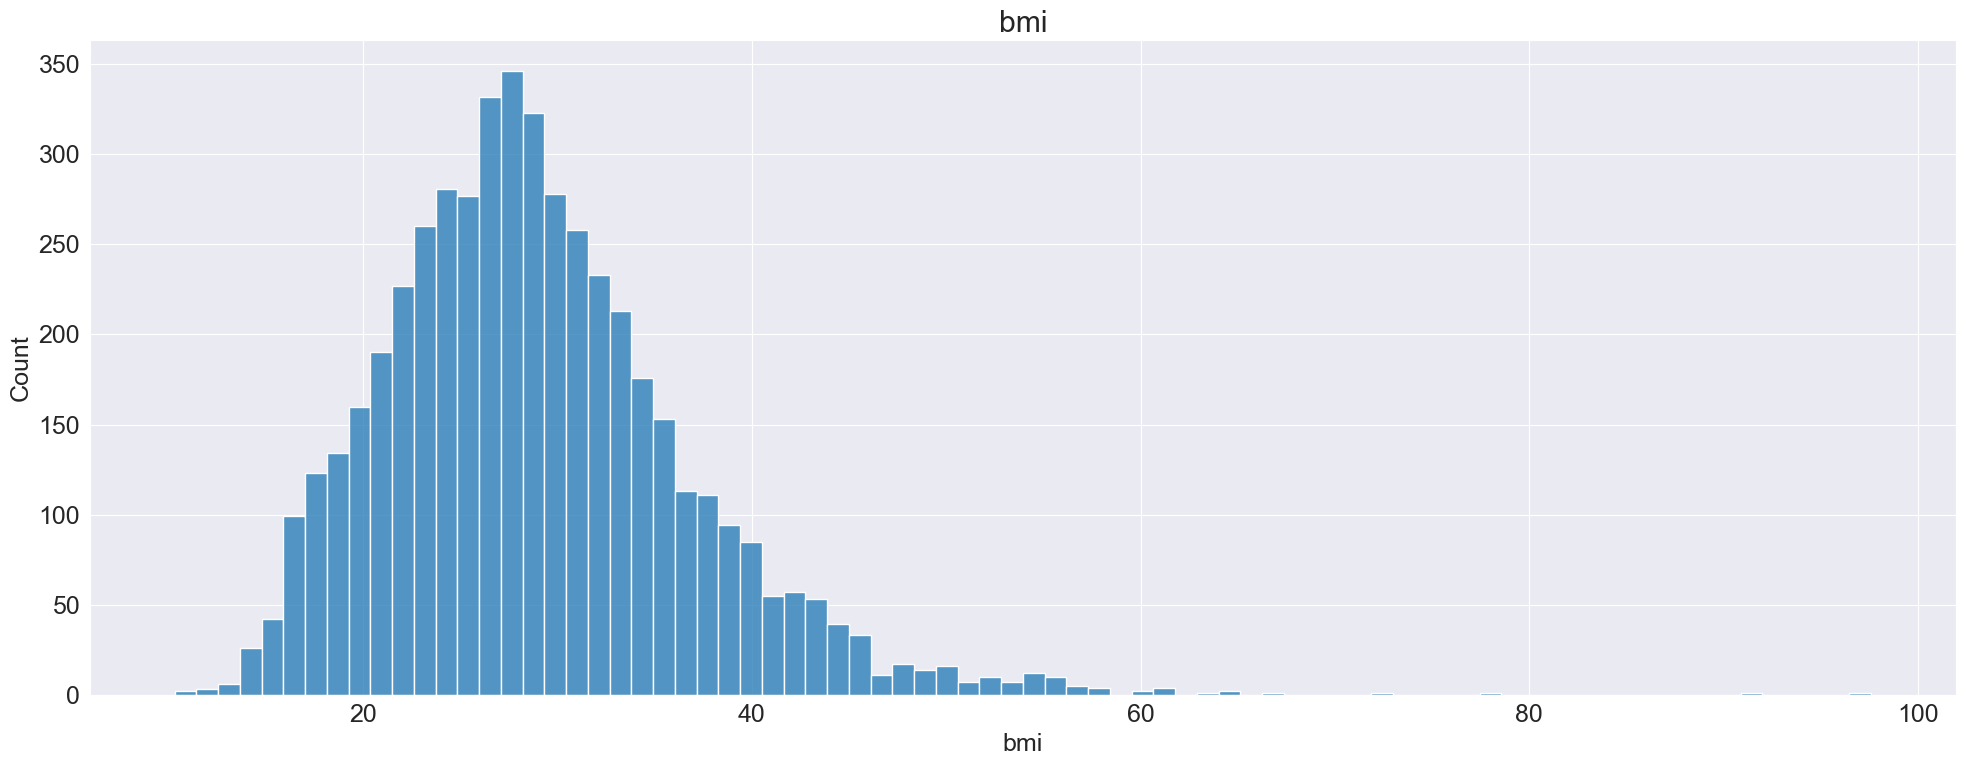

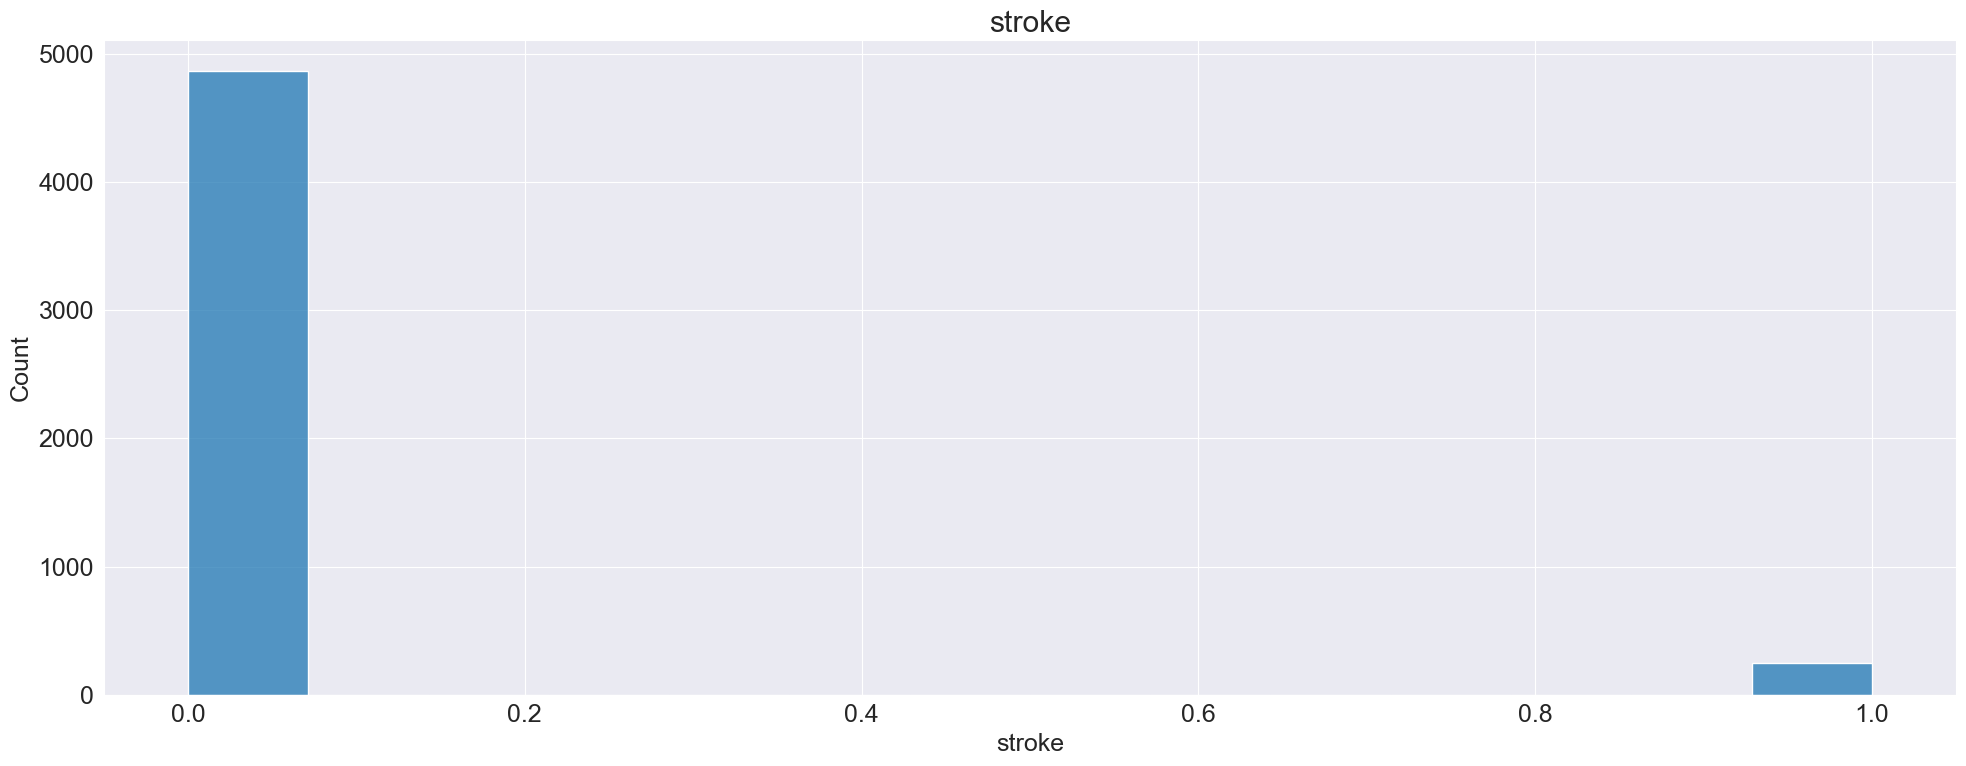

In [221]:
# Create for loop to create histograms for numeric features
# Create variable to select numeric columns
num_columns = df.select_dtypes('number')

for column in num_columns:
  plt.figure(figsize = (20, 8))
  plt.rcParams['font.size'] = 18
  plt.title(column)
  sns.histplot(x = df[column])

  # Display visualizations
  plt.tight_layout()
  plt.show()

In [222]:
# Convert 'stroke', 'heart_disease', and 'hypertension' to object dtype
#df['stroke'] = df['stroke'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')
df['hypertension'] = df['hypertension'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  weight_status      5110 non-null   object 
 12  age_status         5110 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 519.1+ KB


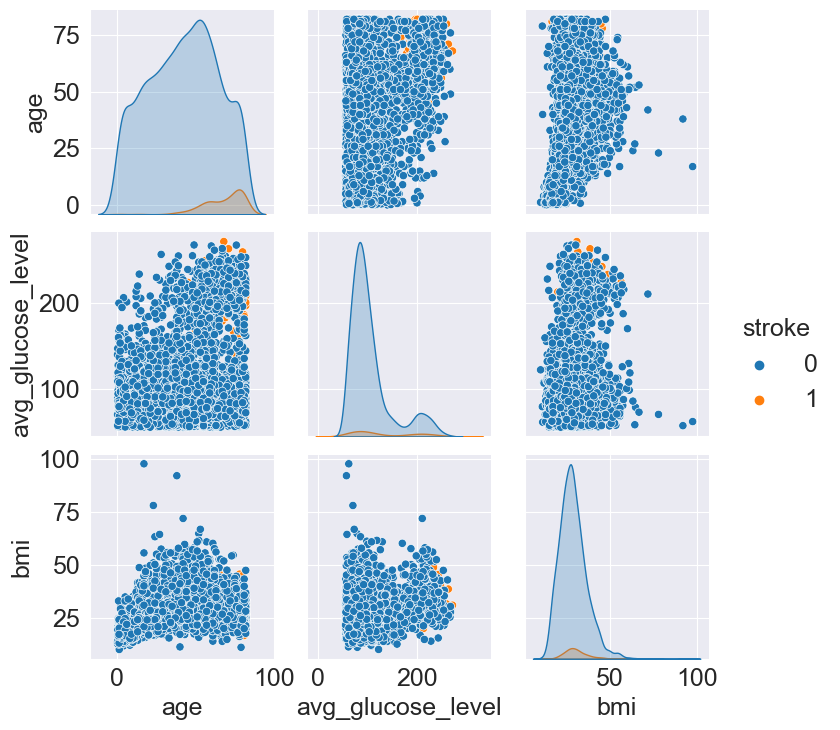

In [223]:
# Create pairplot of all data
# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

plot_col = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
sns.pairplot(plot_col, hue='stroke');

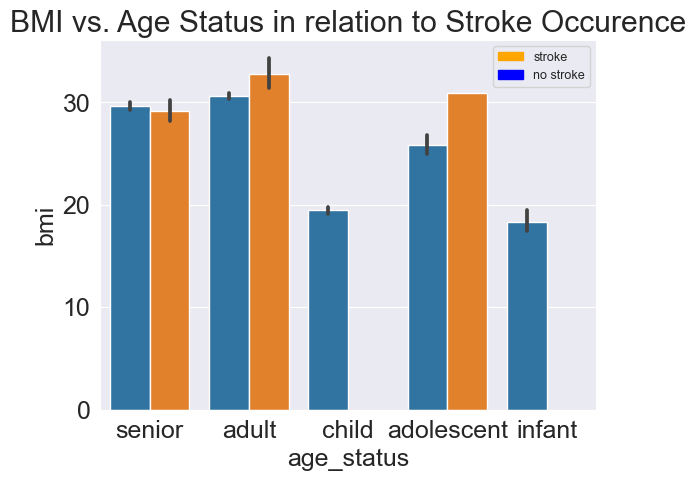

In [224]:
# bmi vs age_status and the relation of stroke
orange_label = mpatches.Patch(color='orange', label='stroke')
blue_label = mpatches.Patch(color='blue', label='no stroke')

sns.barplot(data=df, x='age_status', y='bmi', hue='stroke');
plt.legend(handles=[orange_label, blue_label], fontsize=9, loc='upper right');
plt.title('BMI vs. Age Status in relation to Stroke Occurence');

> This bar chart shows the BMI range according to age status and shows the amount of people that did and did not have strokes. It is important to note that 63% of the data fell into the 'adult' age status, 20% fell into the 'senior' age status, 10% fell into the 'child' age status, 5% into the 'adolescent' age status, and 1% into the 'infant' age status. The graphic shows that higher BMIs could potentially be related to stroke occurrence. Adults had the highest BMIs and stroke occurrence.

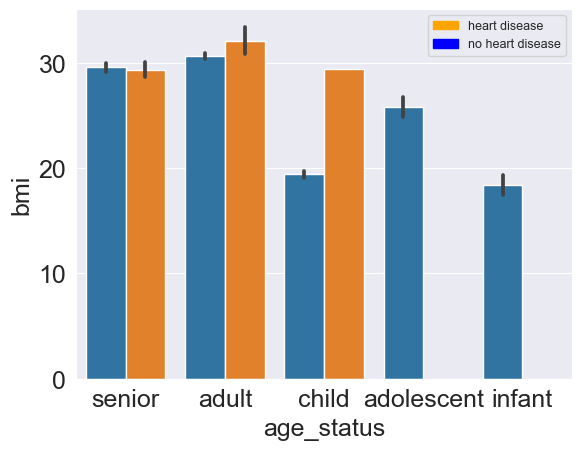

In [225]:
# bmi vs age_status and the relation of heart disease
orange_label = mpatches.Patch(color='orange', label='heart disease')
blue_label = mpatches.Patch(color='blue', label='no heart disease')

sns.barplot(data=df, x='age_status', y='bmi', hue='heart_disease');
plt.legend(handles=[orange_label, blue_label], fontsize=9, loc='upper right');

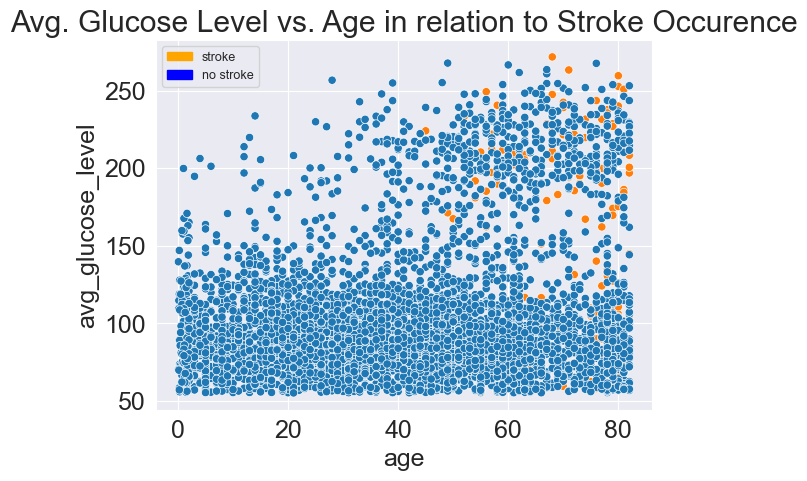

In [226]:
# scatter plot of glucose levels vs age with the relation to stroke
orange_label = mpatches.Patch(color='orange', label='stroke')
blue_label = mpatches.Patch(color='blue', label='no stroke')


sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.legend(handles=[orange_label, blue_label], fontsize=9, loc='upper left');
plt.title('Avg. Glucose Level vs. Age in relation to Stroke Occurence');

> This scatterplot shows average glucose levels according to age in relation to stroke occurrence. A majority of the strokes that occurred tend to be above age 40, while the average glucose levels range greatly.

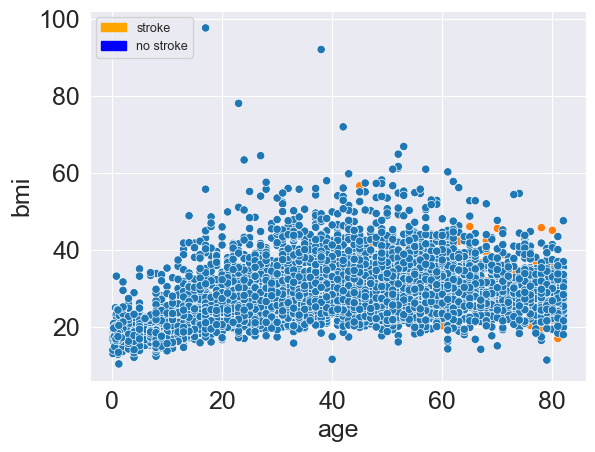

In [227]:
# scatter plot of glucose levels vs age with the relation to stroke
orange_label = mpatches.Patch(color='orange', label='stroke')
blue_label = mpatches.Patch(color='blue', label='no stroke')


sns.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.legend(handles=[orange_label, blue_label], fontsize=9, loc='upper left');

## Preprocessing for Machine Learning (No Feature Engineering)

In [228]:
# Inspect data
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [229]:
# Remove duplicates
df_ml.duplicated().sum()

0

In [230]:
# Remove 'id' column
df_ml.drop('id', axis=1, inplace=True)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [231]:
df_ml.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [232]:
# Determine class balance
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [233]:
# Instantiate smote variable for class balance
smote = SMOTE()

# Instantiate scaler
scaler = StandardScaler()

# Insatiate one hot encoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

# Imputer
mean_imp = SimpleImputer(strategy = 'mean')

# Column selectors
cat_col = make_column_selector(dtype_include = 'object')
num_col = make_column_selector(dtype_include = 'number')

In [234]:
# Model validation
# Features matrix and target
X = df_ml.drop('stroke', axis=1)
y = df_ml['stroke']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [235]:
print(X.head())
y.head()

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  
0          Urban             228.69  36.6  formerly smoked  
1          Rural             202.21   NaN     never smoked  
2          Rural             105.92  32.5     never smoked  
3          Urban             171.23  34.4           smokes  
4          Rural             174.12  24.0     never smoked  


0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [236]:
# Instantiate pipelines
num_pipe = make_pipeline(mean_imp, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [237]:
# Preprocessor
# Tuples for columntransformer
num_tuple = (num_pipe, num_col)
cat_tuple = (ohe, cat_col)

# Columntransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0280>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0820>)])

## Default Logistic Regression Model

In [238]:
# Instance of model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate pipeline
lr_pipe = make_pipeline(preprocessor, smote, log_reg)
lr_pipe

# Fit on training data
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0280>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0820>)])),
                ('smote', SMOTE()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [239]:
# Save Predictions
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

Train Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.99      0.75      0.86      3663
      Stroke       0.13      0.80      0.22       169

    accuracy                           0.76      3832
   macro avg       0.56      0.78      0.54      3832
weighted avg       0.95      0.76      0.83      3832

Test Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.98      0.76      0.86      1198
      Stroke       0.17      0.72      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.74      0.57      1278
weighted avg       0.93      0.76      0.82      1278



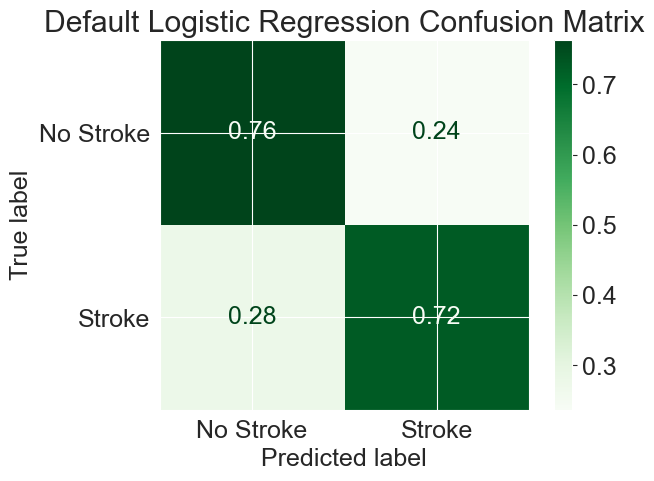

In [240]:
# Default Model Metrics
# Confusion Matrix
labels = ['No Stroke', 'Stroke']
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_preds, cmap='Greens', 
                                        normalize='true', display_labels=labels).ax_.set_title('Default Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_test_preds, target_names=labels))

## Default Random Forest Model

In [241]:
# Default Random Forest Model
# Instance of model
rf = RandomForestClassifier()

# Pipeline
rf_pipe = make_pipeline(preprocessor, smote, rf)

# Fit on Train
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0280>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0820>)])),
                ('smote', SMOTE()),
                ('randomforestclassifier', RandomForestClassifier())])

In [242]:
# Save Predictions
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

Train Classification Report 

              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3663
      Stroke       1.00      1.00      1.00       169

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.94      0.98      0.96      1198
      Stroke       0.17      0.05      0.08        80

    accuracy                           0.93      1278
   macro avg       0.56      0.52      0.52      1278
weighted avg       0.89      0.93      0.91      1278



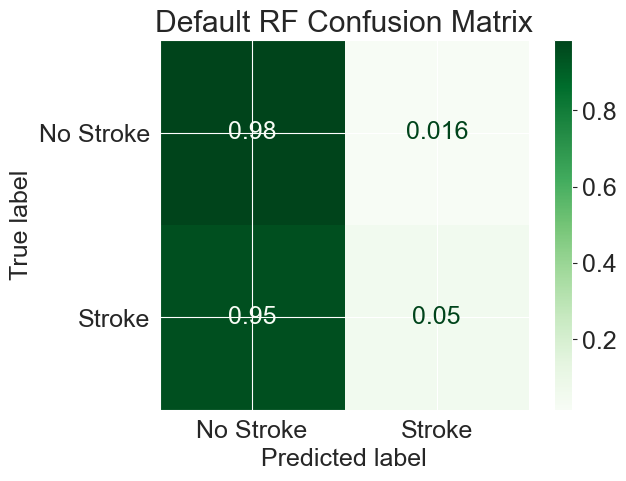

In [243]:
# Default Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds, cmap='Greens', normalize='true', display_labels=labels).ax_.set_title('Default RF Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rf_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, rf_test_preds, target_names=labels))

## Default K-Nearest Neighbor Model

In [244]:
# Default KNN Model
# Instance of model
knn = KNeighborsClassifier()

# Pipeline
knn_pipe = make_pipeline(preprocessor, smote, knn)

# Fit on Train
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0280>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0820>)])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [245]:
# Save Predictions
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

Train Classification Report 

              precision    recall  f1-score   support

   No Stroke       1.00      0.89      0.94      3663
      Stroke       0.29      0.99      0.45       169

    accuracy                           0.89      3832
   macro avg       0.64      0.94      0.69      3832
weighted avg       0.97      0.89      0.92      3832

Test Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.95      0.87      0.91      1198
      Stroke       0.15      0.36      0.22        80

    accuracy                           0.83      1278
   macro avg       0.55      0.61      0.56      1278
weighted avg       0.90      0.83      0.86      1278



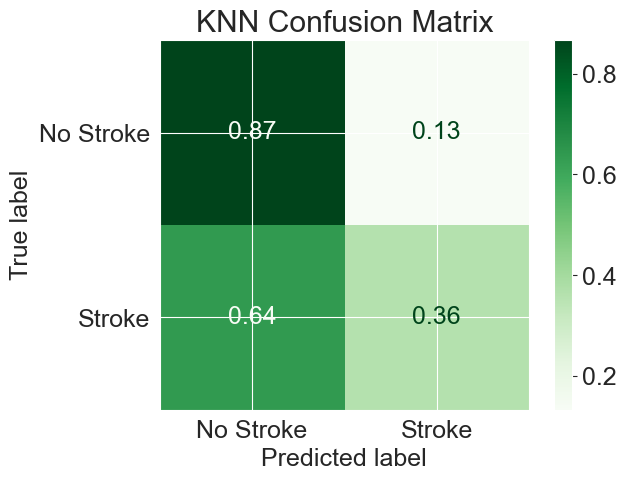

In [246]:
# KNN Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds, cmap='Greens', normalize='true', display_labels=labels).ax_.set_title('KNN Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_preds, target_names=labels))

## Tuned Logistic Regression Model

In [247]:
# Tuning Random Forest Model with GridSearchCV
# Looking a Parameters
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0280>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0820>)])),
  ('smote', SMOTE()),
  ('logisticregression', LogisticRegression(max_iter=1000, random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transfor

In [248]:
# Parameter Grid
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'logisticregression__class_weight': ['balanced', None],
              'logisticregression__max_iter': [100, 1000, 2000],
              'logisticregression__penalty': ['l2', 'l1'],
              'logisticregression__solver': ['liblinear']}

In [249]:
lr_gridscv = GridSearchCV(lr_pipe, param_grid)

# Fit on Train
lr_gridscv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000015082EB0280>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sk...
                                       ('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000, 10000],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__max_iter': [100, 1000, 2000],
                         'logisticregression__penalty': ['l2', 'l1'],
                         'logisticregression__solver': ['liblinear']})

In [250]:
# Display best parameters for tuned model
print('Best Logistic Regression Parameters:')
print(lr_gridscv.best_params_)
lr_best_pipe = lr_gridscv.best_estimator_
print(f'Accuracy of the Best Logistic Regression Model: {lr_best_pipe.score(X_test, y_test)}')

Best Logistic Regression Parameters:
{'logisticregression__C': 100, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Accuracy of the Best Logistic Regression Model: 0.758998435054773


In [251]:
# Save Predictions
lr_best_pipe_train_preds = lr_best_pipe.predict(X_train)
lr_best_pipe_test_preds = lr_best_pipe.predict(X_test)

Train Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.99      0.76      0.86      3663
      Stroke       0.13      0.78      0.22       169

    accuracy                           0.76      3832
   macro avg       0.56      0.77      0.54      3832
weighted avg       0.95      0.76      0.83      3832

Test Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.98      0.76      0.86      1198
      Stroke       0.17      0.71      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.74      0.56      1278
weighted avg       0.92      0.76      0.82      1278



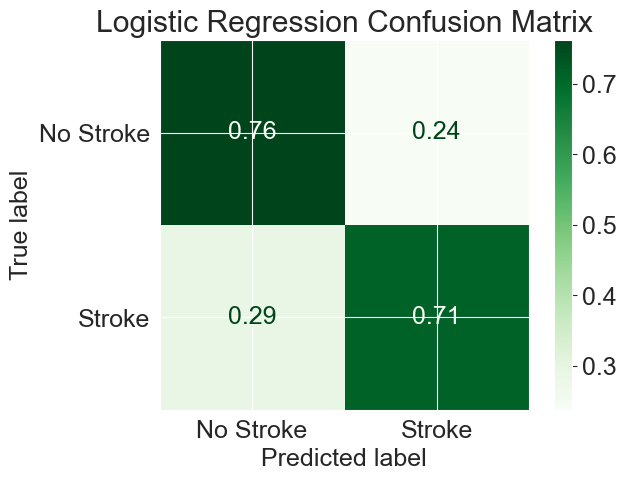

In [252]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_best_pipe_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_best_pipe_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_best_pipe_test_preds, target_names=labels))

## Feature Engineering For Machine Learning

In [53]:
# Use 'bmi' column to create a new categorical column
# bmi < 18.5 = underweight
# bmi >= 18.5 | < 24.9 = normal weight
# bmi >= 25 | < 29.9 = overweight
# bmi >= 30 | < 34.9 = class 1 obesity
# bmi >= 35 | < 39.9 = class 2 obesity
# bmi >= 40 = class 3 obesity
df_ml['weight_status'] = df_ml['bmi'].apply(lambda x: 'underweight' if x < 18.5 else
                            'normal weight' if x >= 18.5 and x < 24.9 else
                            'overweight' if x >= 25 and x < 29.9 else 
                            'class 1 obesity' if x >= 30 and x < 34.9 else
                            'class 2 obesity' if x >= 35 and x < 39.9 else
                            'class 3 obesity')
df_ml['weight_status'].value_counts()

overweight         1383
normal weight      1216
class 1 obesity     989
class 3 obesity     684
class 2 obesity     501
underweight         337
Name: weight_status, dtype: int64

In [54]:
# Drop 'bmi' column
df_ml.drop(columns='bmi', inplace=True)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
 10  weight_status      5110 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 439.3+ KB


In [55]:
# Use 'age' column to create a new categorical column
df_ml['age_status'] = df_ml['age'].apply(lambda x: 'infant' if x <= 1 else 'child' if x > 1
                           and x <= 12 else 'adolescent' if x > 12 and x <= 17
                           else 'adult' if x > 17 and x < 65 else 'senior')
df_ml['age_status'].value_counts()

adult         3227
senior        1027
child          540
adolescent     268
infant          48
Name: age_status, dtype: int64

In [56]:
# Drop 'age' column
df_ml.drop(columns='age', inplace=True)
df_ml.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,weight_status,age_status
0,Male,0,1,Yes,Private,Urban,228.69,formerly smoked,1,class 2 obesity,senior
1,Female,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,class 3 obesity,adult
2,Male,0,1,Yes,Private,Rural,105.92,never smoked,1,class 1 obesity,senior
3,Female,0,0,Yes,Private,Urban,171.23,smokes,1,class 1 obesity,adult
4,Female,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,normal weight,senior


## Tuned Model with Feature Engineering

In [57]:
# Model validation
# Features matrix and target
X = df_ml.drop('stroke', axis=1)
y = df_ml['stroke']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
# Instantiate pipelines
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [59]:
# Preprocessor
# Tuples for columntransformer
num_tuple = (num_pipe, num_col)
cat_tuple = (ohe, cat_col)

# Columntransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000150FC5ABDC0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000150FC5ABFD0>)])

In [60]:
# Default Random Forest Model
# Instance of model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Pipeline
lr_pipe = make_pipeline(preprocessor, smote, lr)

# Fit on Train
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000150FC5ABDC0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000150FC5ABFD0>)])),
                ('smote', SMOTE()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [61]:
# Save Predictions
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

Train Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.99      0.78      0.87      3663
      Stroke       0.14      0.75      0.23       169

    accuracy                           0.78      3832
   macro avg       0.56      0.76      0.55      3832
weighted avg       0.95      0.78      0.84      3832

Test Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.97      0.78      0.86      1198
      Stroke       0.16      0.65      0.26        80

    accuracy                           0.77      1278
   macro avg       0.57      0.71      0.56      1278
weighted avg       0.92      0.77      0.82      1278



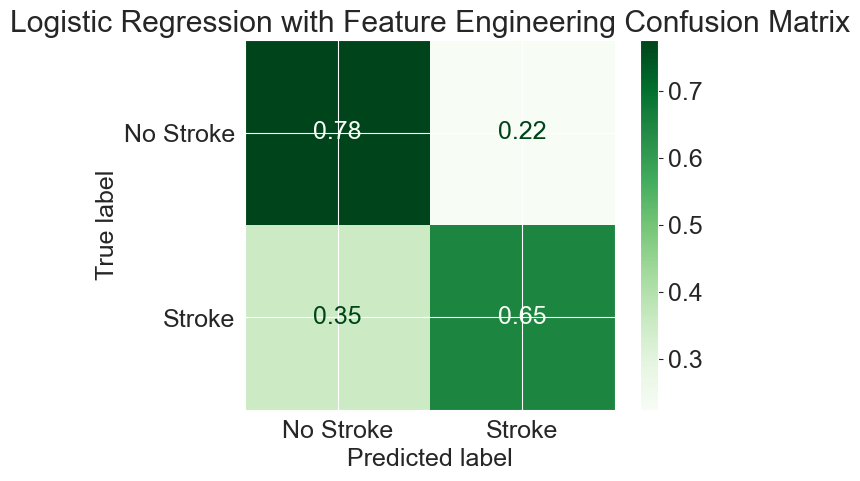

In [62]:
# Default Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression with Feature Engineering Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, lr_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, lr_test_preds, target_names=labels))

In [63]:
# Tuning Random Forest Model with GridSearchCV
# Looking a Parameters
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x00000150FC5ABDC0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x00000150FC5ABFD0>)])),
  ('smote', SMOTE()),
  ('logisticregression', LogisticRegression(max_iter=1000, random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   St

In [112]:
# Parameter Grid
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'logisticregression__class_weight': ['balanced', None],
              'logisticregression__max_iter': [3000, 4000, 5000],
              'logisticregression__penalty': ['none'],
              'logisticregression__solver': ['lbfgs']}

In [113]:
lr_gridscv = GridSearchCV(lr_pipe, param_grid)

# Fit on Train
lr_gridscv.fit(X_train, y_train)

C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\l

C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\l

C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\l

C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\l

C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hamma\anaconda3\envs\dojo-env\l

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000150FC5ABDC0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer....])),
                                       ('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000, 10000],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__max_iter': [3000, 4000, 5000],
                         'logisticregression__penalty': ['none'],
                         'logisticregression__solver': ['lbfgs']})

In [114]:
# Display best parameters for tuned model
print('Best Logistic Regression Parameters:')
print(lr_gridscv.best_params_)
best_pipe = lr_gridscv.best_estimator_
print(f'Accuracy of the Best Logistic Regression Model: {best_pipe.score(X_test, y_test)}')

Best Logistic Regression Parameters:
{'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 3000, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'lbfgs'}
Accuracy of the Best Logistic Regression Model: 0.7660406885758998


In [115]:
# Save Predictions
best_pipe_train_preds = best_pipe.predict(X_train)
best_pipe_test_preds = best_pipe.predict(X_test)

Train Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.99      0.78      0.87      3663
      Stroke       0.14      0.75      0.23       169

    accuracy                           0.78      3832
   macro avg       0.56      0.76      0.55      3832
weighted avg       0.95      0.78      0.84      3832

Test Classification Report 

              precision    recall  f1-score   support

   No Stroke       0.97      0.77      0.86      1198
      Stroke       0.16      0.65      0.26        80

    accuracy                           0.77      1278
   macro avg       0.57      0.71      0.56      1278
weighted avg       0.92      0.77      0.82      1278



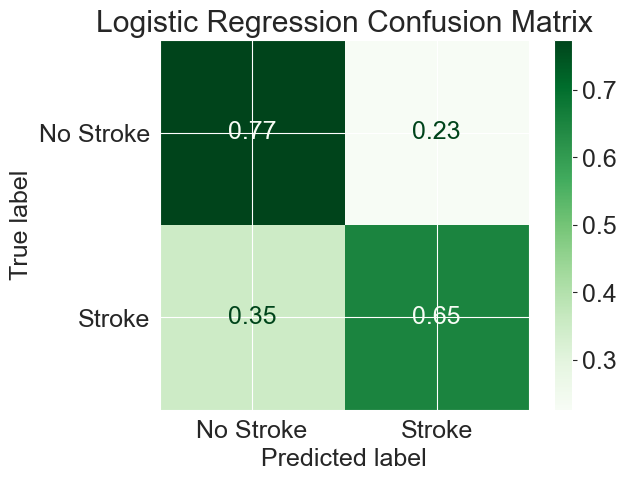

In [116]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, best_pipe_test_preds, 
                                        cmap='Greens', normalize='true', 
                                        display_labels=labels).ax_.set_title('Logistic Regression Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, best_pipe_train_preds, target_names=labels))
print('Test Classification Report', '\n')
print(classification_report(y_test, best_pipe_test_preds, target_names=labels))

## Recommendations

1. Model Recommendation
    - The model I recommend 